# Test Pre-Train Model
mengetes model yang telah dibuat dengan input custom

In [1]:
import pandas as pd 
import numpy as np
import pickle

In [2]:
# Load transformer from file using pickle
with open('transformer.pkl', 'rb') as file:
    transformer = pickle.load(file)

In [3]:
#Load model
# Muat model Logistic Regression
with open('Logistic Regression.pkl', 'rb') as f:
    logreg_model = pickle.load(f)

# Muat model Decision Tree
with open('Decision Tree.pkl', 'rb') as f:
    dt_model = pickle.load(f)

# Muat model Random Forest
with open('Random Forest.pkl', 'rb') as f:
    rf_model = pickle.load(f)

# Muat model K-Nearest Neighbors
with open('K-Nearest Neighbors.pkl', 'rb') as f:
    knn_model = pickle.load(f)

# Muat model Gradient Boosting
with open('Gradient Boosting.pkl', 'rb') as f:
    gb_model = pickle.load(f)

# Muat model Naive Bayes
with open('Multinomial Naive Bayes.pkl', 'rb') as f:
    nb_model = pickle.load(f)

In [13]:
# Load test data
text_input = "Awokawokawok, muka udah mirip badut mau jadi bandar slot pula"
#text_input = "kamu ini itu"

In [14]:
from nltk.tokenize import word_tokenize
import string 
import re #regex library

def preprocess_text(text):
    # Case folding
    text = text.lower()
    
    # remove tab, new line, ans back slice
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    
    # remove non ASCII (emoticon, chinese word, .etc)
    text = text.encode('ascii', 'replace').decode('ascii')

    # remove mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())

    # remove incomplete URL
    text = text.replace("http://", " ").replace("https://", " ")

    #remove number
    text = re.sub(r"\d+", "", text)

    #remove punctuation
    text = text.translate(str.maketrans("","",string.punctuation))

    #remove whitespace leading & trailing
    text = text.strip()

    #remove multiple whitespace into single whitespace
    text = re.sub('\s+',' ',text)

    # remove single char
    text = re.sub(r"\b[a-zA-Z]\b", "", text)

    #Remove repeating char
    text = re.sub(r'(\w)\1+\b', r'\1',text)

    #Remove repeating word
    text = re.sub(r'\b(\w+)(\1)+\b', r'\1',text)

    # NLTK word rokenize 
    return word_tokenize(text)


processed_text = preprocess_text(text_input)
print(processed_text)

['awok', 'muka', 'udah', 'mirip', 'badut', 'mau', 'jadi', 'bandar', 'slot', 'pula']


In [15]:
from nltk.corpus import stopwords

# ----------------------- get stopword from NLTK stopword -------------------------------
# get stopword indonesia
list_stopwords = stopwords.words('indonesian')

# ----------------------- add stopword from txt file ------------------------------------
# read txt stopword using pandas
txt_stopword = pd.read_csv("stopwordsID.txt", header = None)

# convert stopword string to list & append additional stopword
list_stopwords.extend([x for x in txt_stopword[0]])

#convert list to dictionary
list_stopwords = set(list_stopwords)


#remove stopword pada list token
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]


processed_text_WSW = stopwords_removal(processed_text)
print(processed_text_WSW)

['awok', 'muka', 'udah', 'badut', 'bandar', 'slot']


In [16]:
normalizad_word = pd.read_excel("kamus_singkatan.xlsx")

normalizad_word_dict = {}

for index, row in normalizad_word.iterrows():
    if row[0] not in normalizad_word_dict:
        normalizad_word_dict[row[0]] = row[1] 

def normalized_term(document):
    return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in document]

text_normalized = normalized_term(processed_text_WSW)

# menggabungkan setiap elemen dalam text_normalized menjadi satu string
string_data = ' '.join(text_normalized)
string_data

'awok muka sudah badut bandar slot'

In [17]:
# import Sastrawi package
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Melakukan stemming
stemmed_sentence = stemmer.stem(string_data)

print(stemmed_sentence)

awok muka sudah badut bandar slot


Logistic Regression
Predicted Class: Bullying
Confidence: 0.692947551839235
 
Decision Tree
Predicted Class: Bullying
Confidence: 1.0
 
Random Forest
Predicted Class: Bullying
Confidence: 0.8
 
K-Nearest Neighbors
Predicted Class: Bullying
Confidence: 1.0
 
Gradient Boosting
Predicted Class: Bullying
Confidence: 0.7984109294352751
 
Multinomial Naive Bayes
Predicted Class: Bullying
Confidence: 0.7752289382744301
 
Total Bullying Confidence: 5.06658741954894
Total Non-Bullying Confidence: 0.0
 
Kesimpulan:
karena nilai total_bullying_confidence > total_non_bullying_confidence, maka Kalimat cenderung dikategorikan sebagai Bullying


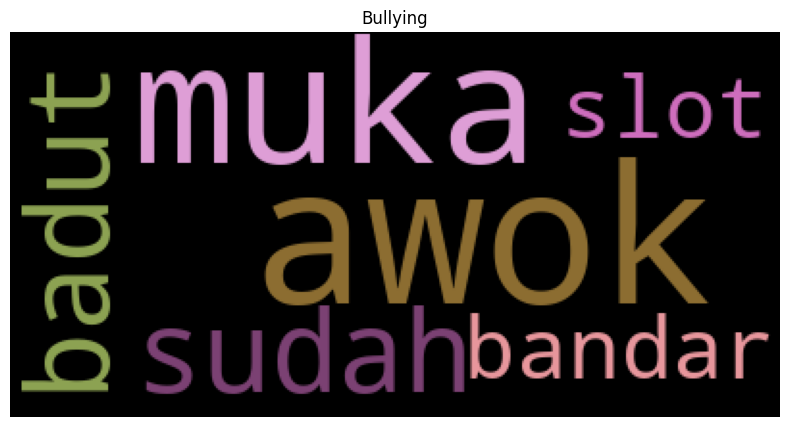

In [18]:
import wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize

numerical_input = transformer.transform([stemmed_sentence])

models_to_use = [logreg_model, dt_model, rf_model, knn_model, gb_model, nb_model]
names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'K-Nearest Neighbors', 'Gradient Boosting', 'Multinomial Naive Bayes']

total_bullying_confidence = 0.0
total_non_bullying_confidence = 0.0

for model, model_name in zip(models_to_use, names):
    prediction = model.predict(numerical_input)
    
    #digunakan untuk memperoleh probabilitas prediksi dari model.
    prediction_proba = model.predict_proba(numerical_input)
    confidence = prediction_proba.max()

    # Menampilkan hasil evaluasi model
    print(model_name)
    print("Predicted Class:", prediction[0])
    print("Confidence:", confidence)
    print(" ")

    # Menjumlahkan nilai confidence untuk bullying dan non-bullying
    if prediction[0] == 'Bullying':
        total_bullying_confidence += confidence
    else:
        total_non_bullying_confidence += confidence

print("Total Bullying Confidence:", total_bullying_confidence)
print("Total Non-Bullying Confidence:", total_non_bullying_confidence)
print(" ")
print("Kesimpulan:")

if total_bullying_confidence > total_non_bullying_confidence:
    predicted_class = str(prediction[0])  # Convert to string
    tokenized_data = word_tokenize(string_data)
    print("karena nilai total_bullying_confidence > total_non_bullying_confidence, maka Kalimat cenderung dikategorikan sebagai Bullying")
else:
    predicted_class = str(prediction[0])  # Convert to string
    tokenized_data = word_tokenize(string_data)
    print("karena nilai total_bullying_confidence < total_non_bullying_confidence, maka Kalimat cenderung dikategorikan sebagai Non-bullying")



    # Membuat WordCloud
wc = wordcloud.WordCloud(collocations=False, colormap="tab20b").generate(" ".join(tokenized_data))

plt.figure(figsize=(15,5))
plt.title(predicted_class)
plt.imshow(wc, interpolation='antialiased')
_ = plt.axis("off")

